# British Airways - Customer Sentiment Analysis

### Introduction: ###

British Airways (BA), the flag carrier of the United Kingdom, serves passengers from all over the world with an extensive network of routes. To satisfy customers and establish BA as a premium airline, these aircraft must operate flawlessly and provide excellent customer service.

Exploring customers’ perceptions and feedback of their interactions with BAs is essential to ensure satisfaction. In the current digital age, consumers often post their thoughts and experiences on online platforms, providing companies with insightful feedback to improve their offerings

### Problem Statement ###

British Airways, one of the world’s largest airlines, has made it a priority to know how their customers feel in order to improve service and maintain satisfaction. This project aims to find customer feedback about British Airways as compiled from website airlinequality.com. We aim to gain insights into consumer sentiment and preferences through topic sampling, sentiment analysis, and identifying positive and negative comments. This insight can help with strategic decision making and service improvement.

#### Steps Involved in this projects ####
##### 1. Loading of libraries #####
##### 2. Data Collection #####
##### 3. Data Preprocessing #####
##### 4. Sentiment Analysis #####
##### 5. Topic Modelling #####
##### 6. Visualization #####

## 1. Loading of libraries ##

We install libraries in Python to take advantage of pre-written code and functions. This accelerates development, saves time and provides legal certainty. British Airways requires the following libraries to analyze customer feedback:

Requests for making HTTP requests, 

BeautifulSoup for parsing HTML, 

Pandas for data manipulation, 

nltk for natural language processing tasks, and 

matplotlib, seaborn, and wordcloud for data visualization. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from collections import Counter
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\ram\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


## 2. Data Collection ##

Now let’s talk about how I got data for this project. I decided to remove ratings from the airlinequality.com forum, and focus on opinions about British Airways. I scraped data from many internet pages using Python modules like BeautifulSoup and queries. I saved the data to local, storing it so I could analyze it later.

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Scraping is done,Scraped 10 page and extracted 1000 reviews.

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


In [4]:
df.to_csv("//Mac/Home/Downloads/BA_reviews.csv")

In [5]:
data = df

In [6]:
data.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


## 3. Data Preprocessing ##

### 3.1 Data Cleaning ###

In [7]:
# Split the reviews after the delimiter "|"
data[['verification_status', 'review_text']] = data['reviews'].str.rsplit("|",n=1, expand=True)
# Drop the original 'reviews' column
data.drop(columns=['reviews'], inplace=True)


In [8]:
# Strip white spaces from the new columns
data['verification_status'] = data['verification_status'].str.strip()
data['review_text'] = data['review_text'].str.strip()
data['verification_status'] = data['verification_status'].str.replace('✅', '')
print(data)

    verification_status                                        review_text
0         Trip Verified  We chose Rotterdam and London City airport bec...
1         Trip Verified  The entire booking and ticketing experience ha...
2          Not Verified  British Airways cancelled my flight less than ...
3          Not Verified  I wanted to write this review so I could give ...
4         Trip Verified  Check in fast and friendly. Security a breeze....
..                  ...                                                ...
995       Trip Verified  London to Seattle. My seat was on the upper de...
996       Trip Verified  London to Gibraltar. Check in at T3 was fine, ...
997       Trip Verified  London to Boston. BA replaced A380 with a very...
998       Trip Verified  London to Doha. Similar to our outbound flight...
999       Trip Verified  London Heathrow to Houston. Despite sitting at...

[1000 rows x 2 columns]


To improve structure and analysis, the review column split into two different columns, verification_status and review_text, with "|" and the installer. White space is then removed from the verification_status and review_text columns to ensure accuracy and consistency. Finally, the '✅' symbol was removed from the verification_status column because it may not be suitable for further analysis, making the information easier for later manipulation and searching

### 3.2 Tokenization ##

In [9]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


data['tokanized_words'] = data['review_text'].apply(preprocess_text)

Tokenizing the words in the DataFrame's review_text column separates text into individual words to facilitate processing and analysis. The preprocess_text function is designed to tokenize the text using NLTK's word_tokenize,then removed stopwords, punctuation and numbers, and lowercase the text makes easy for further analysis. The tokenized form of the text data is contained in a new column called tokenized_words, which is created by applying this function to each entry in the review_text column. By guaranteeing consistency and eliminating unnecessary elements in the preprocessing stage gets the data ready for additional analysis and modeling.

In [10]:
print(data.describe())

       verification_status                                        review_text  \
count                 1000                                               1000   
unique                   4                                               1000   
top          Trip Verified  We chose Rotterdam and London City airport bec...   
freq                   760                                                  1   

                                          tokanized_words  
count                                                1000  
unique                                               1000  
top     [chose, rotterdam, london, city, airport, conv...  
freq                                                    1  


## 4. Sentiment Analysis ##

In [11]:
sid = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['tokanized_words'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

### 4.1 Word Identification ###

In [12]:
# Define thresholds for sentiment classification
positive_threshold = 0.1
negative_threshold = -0.1

# Function to classify sentiment based on sentiment scores
def classify_sentiment(score):
    if score > positive_threshold:
        return 'positive'
    elif score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification function to 'sentiment_scores' column
data['sentiment_label'] = data['sentiment_scores'].apply(classify_sentiment)


### 4.2 Linguistic Processing Module  ###

#### 4.2.1 Sentiment Word Extraction  ####

In [13]:
# Download NLTK's opinion lexicon if not already downloaded


# Get the list of positive and negative words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to extract positive and negative words from a review
def extract_pos_neg_words(review):
    # Tokenize the review text
    words = review.split()
    # Count the occurrences of each word
    word_counts = Counter(words)
    # Extract positive and negative words
    positive_words_found = [word for word in words if word in positive_words]
    negative_words_found = [word for word in words if word in negative_words]
    return positive_words_found, negative_words_found

# Iterate through each review and extract positive and negative words
positive_words_list = []
negative_words_list = []
for index, row in df.iterrows():
    review_text = row['review_text']
    positive_words_found, negative_words_found = extract_pos_neg_words(review_text)
    positive_words_list.append(positive_words_found)
    negative_words_list.append(negative_words_found)

# Add positive and negative words as columns to the DataFrame
data['positive_words'] = positive_words_list
data['negative_words'] = negative_words_list


#### 4.2.2 Lemmatization ####

In [14]:
# Function to lemmatize words using WordNet
def lemmatize_word(word):
    lemma = nltk.WordNetLemmatizer().lemmatize(word)
    if lemma == word:
        return lemma
    else:
        syns = wordnet.synsets(word)
        if syns:
            pos = syns[0].pos()
            if pos == 'a':  # Adjective
                return word
            if pos == 's':  # Adjective Satellite
                return word
            if pos == 'r':  # Adverb
                return word
    return lemma

# Flatten the lists of positive and negative words across all reviews and lemmatize
all_positive_words = [lemmatize_word(word) for sublist in data['positive_words'] for word in sublist]
all_negative_words = [lemmatize_word(word) for sublist in data['negative_words'] for word in sublist]

# Count the occurrences of each word
positive_word_counts = Counter(all_positive_words)
negative_word_counts = Counter(all_negative_words)


## 5. Topic Modelling ##

In [15]:
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X = vectorizer.fit_transform(df['tokanized_words'])
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

C:\Users\ram\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LatentDirichletAllocation(random_state=42)

In [16]:
def display_topics(model, feature_names,no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()
no_top_words = 5
feature_names = vectorizer.get_feature_names_out()  # Use get_feature_names_out() method
display_topics(lda, feature_names, no_top_words)


Topic 1:
ba staff ticket service ’

Topic 2:
flight ba us cancelled hours

Topic 3:
flight british airways ba hours

Topic 4:
flight good ba crew service

Topic 5:
flight british ’ airways service

Topic 6:
crew ba service food flight

Topic 7:
british flight airways london ba

Topic 8:
’ luggage one ba flight

Topic 9:
ba flight ’ seat seats

Topic 10:
flight ba service class staff



In [17]:
# Assuming 'lda' is your trained LDA model and 'vectorizer' is your CountVectorizer or TF-IDFVectorizer

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to map topic indices to their associated words
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
    topic_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]

# Get the topic distribution for each review
topic_distribution = lda.transform(X)

# Assign the dominant topic (words) for each review
data['topic_words'] = [topic_words[idx] for idx in topic_distribution.argmax(axis=1)]

# Display the DataFrame with assigned topic words
print(data)

    verification_status                                        review_text  \
0         Trip Verified  We chose Rotterdam and London City airport bec...   
1         Trip Verified  The entire booking and ticketing experience ha...   
2          Not Verified  British Airways cancelled my flight less than ...   
3          Not Verified  I wanted to write this review so I could give ...   
4         Trip Verified  Check in fast and friendly. Security a breeze....   
..                  ...                                                ...   
995       Trip Verified  London to Seattle. My seat was on the upper de...   
996       Trip Verified  London to Gibraltar. Check in at T3 was fine, ...   
997       Trip Verified  London to Boston. BA replaced A380 with a very...   
998       Trip Verified  London to Doha. Similar to our outbound flight...   
999       Trip Verified  London Heathrow to Houston. Despite sitting at...   

                                       tokanized_words  sentime

In [18]:
# Flatten the lists of words in the 'topic_words' column
all_words = [word for sublist in data['topic_words'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the top 20 most frequent words
top_30_words = word_counts.most_common(30)

# Print the top 20 words
for word, count in top_30_words:
    print(f"{word}: {count}")

flight: 980
ba: 946
service: 533
crew: 405
good: 336
hours: 286
’: 236
us: 223
cancelled: 223
british: 136
airways: 136
seat: 125
seats: 125
staff: 74
food: 69
class: 54
luggage: 37
one: 37
ticket: 20
london: 19


In [19]:
# List of unnecessary words
unnecessary_words = {'ba', 'good', '’', 'us', 'british', 'airways', 'one', 'london'}

# Function to filter out unnecessary words from a list of words
def filter_words(words):
    return [word for word in words if word not in unnecessary_words]

# Apply the filtering function to the 'topic_words' column
data['topic_words'] = data['topic_words'].apply(filter_words)

# Flatten the filtered lists of words
filtered_words = [word for sublist in data['topic_words'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Get all words with their counts
all_words = word_counts.items()

# Print all words with their counts
for word, count in all_words:
    print(f"{word}: {count}")


flight: 980
crew: 405
service: 533
seat: 125
seats: 125
cancelled: 223
hours: 286
luggage: 37
food: 69
class: 54
staff: 74
ticket: 20


In [20]:
# Explode the 'topic_words' column to convert lists into separate rows
exploded_data = data.explode('topic_words')

# Group by 'topic_words' and 'sentiment_label' and count occurrences
grouped = exploded_data.groupby(['topic_words', 'sentiment_label']).size().unstack(fill_value=0)


In [21]:
data.head()

,verification_status,review_text,tokanized_words,sentiment_scores,sentiment_label,positive_words,negative_words,topic_words
0,Trip Verified,We chose Rotterdam and London City airport bec...,"[chose, rotterdam, london, city, airport, conv...",0.3818,positive,"[swift, comfortable, promptly, good]","[unfortunately, hesitant]","[flight, crew, service]"
1,Trip Verified,The entire booking and ticketing experience ha...,"[entire, booking, ticketing, experience, stres...",-0.9595,negative,[],"[stressful, lost, hard, loss]","[flight, seat, seats]"
2,Not Verified,British Airways cancelled my flight less than ...,"[british, airways, cancelled, flight, less, ho...",-0.7650,negative,[refund],"[blind, complaint, strike, awful]","[flight, cancelled, hours]"
3,Not Verified,I wanted to write this review so I could give ...,"[wanted, write, review, could, give, huge, tha...",0.9637,positive,"[thank, helped, gratitude, kindness]",[urgent],"[luggage, flight]"
4,Trip Verified,Check in fast and friendly. Security a breeze....,"[check, fast, friendly, security, breeze, loun...",0.9686,positive,"[fast, comfortable, good, like, brilliant]","[nightmare, hell]","[flight, crew, service]"


## 6.Visualization ##

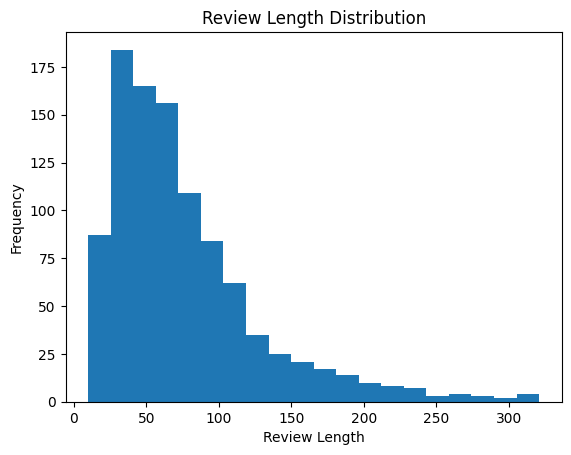

In [22]:
data['review_length'] = data['tokanized_words'].apply(len)
plt.hist(data['review_length'], bins=20)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

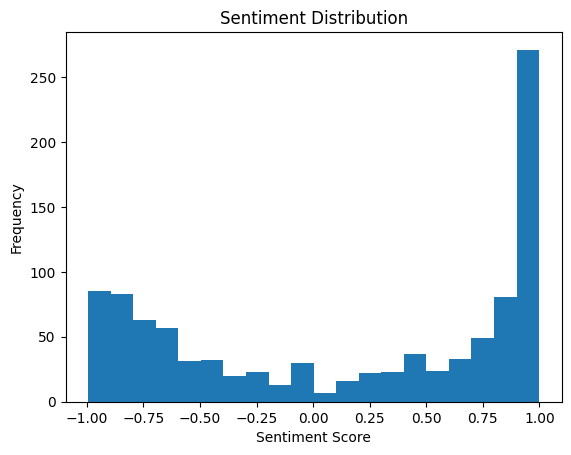

In [23]:
# Visualize sentiment distribution
plt.hist(data['sentiment_scores'], bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The distribution of sentiments is shown by producing a histogram with sentiment scores ranging from -1 to +1 on the x-axis. A cluster of numbers centered around +1 indicates a preponderance of positive emotion, with negative sentiment and a lesser amount of neutral sentiment following.

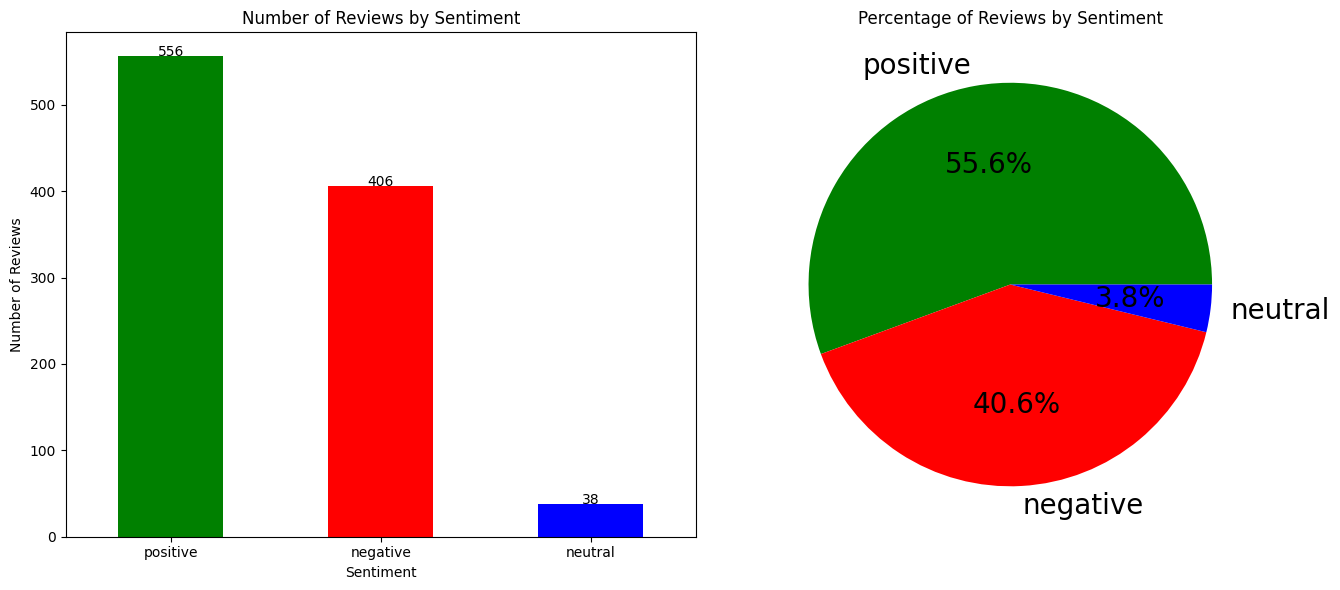

In [30]:
import matplotlib.pyplot as plt

# Your existing code for the bar chart
sentiment_counts = data['sentiment_label'].value_counts()

plt.figure(figsize=(14, 6))

# Bar chart
plt.subplot(1, 2, 1)
ax1 = sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
for i in ax1.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

# Pie chart
plt.subplot(1, 2, 2)
sizes = sentiment_counts.values
labels = sentiment_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red', 'blue'],textprops={'fontsize': 20})
plt.title('Percentage of Reviews by Sentiment')

plt.tight_layout()
plt.show()


The sentiment distribution, which includes 55.6% positive, 40.6% negative, and 3.8% neutral observations out of 1000, provides a clearer picture of the sentiment polarity of the dataset

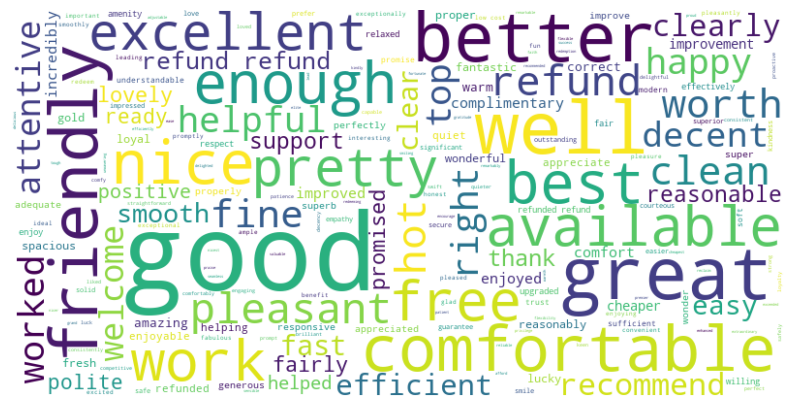

In [31]:
# Word cloud
all_words = ' '.join([word for sublist in data['positive_words'] for word in sublist])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

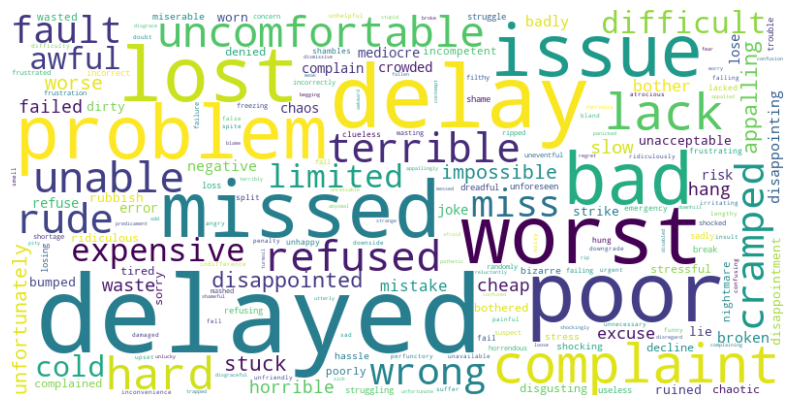

In [32]:
# Word cloud
all_words = ' '.join([word for sublist in data['negative_words'] for word in sublist])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() 

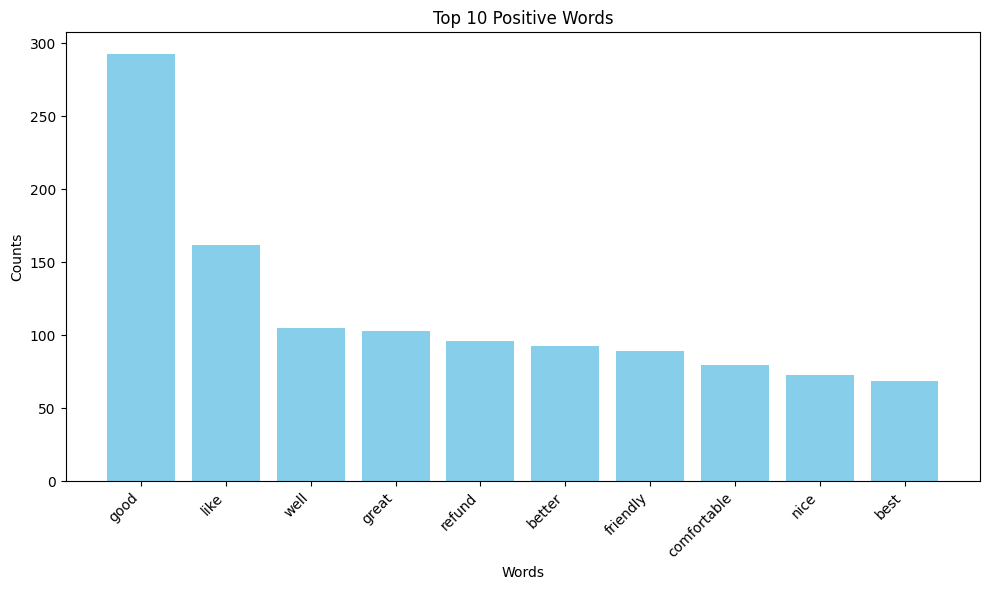

In [33]:
# Get the top 10 positive words and their counts
top_10_positive_words = positive_word_counts.most_common(10)
positive_words, positive_counts = zip(*top_10_positive_words)

# Plot the top 10 positive words
plt.figure(figsize=(10, 6))
plt.bar(positive_words, positive_counts, color='skyblue')
plt.title('Top 10 Positive Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top ten evaluation words, including "good," "like," "good," "great," "give back," "good," "friendly," "comfortable. Insightful information about common emotions that consumers can provide. This visualization shows the characteristics of the products or services that consumers value most, with "good" at the top of the list and categories like "like" following in lower order.

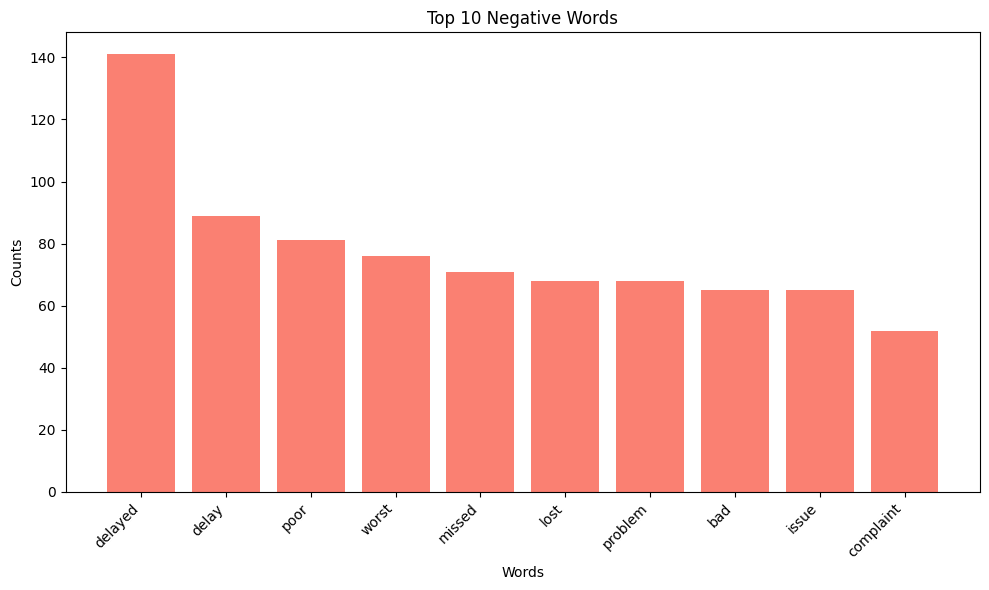

In [34]:

# Get the top 10 negative words and their counts
top_10_negative_words = negative_word_counts.most_common(10)
negative_words, negative_counts = zip(*top_10_negative_words)

# Plot the top 10 negative words
plt.figure(figsize=(10, 6))
plt.bar(negative_words, negative_counts, color='salmon')
plt.title('Top 10 Negative Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top 10 negative words taken from the reviews included delayed,delay,poor,worst,missed,lost,problem,bad,issue,complaint.Giving insight into the most commonly cited customer complaints, this study focuses on major pain points and areas of dissatisfaction, with "delayed" at the top of the list, and "poor" being next this follows in descending order

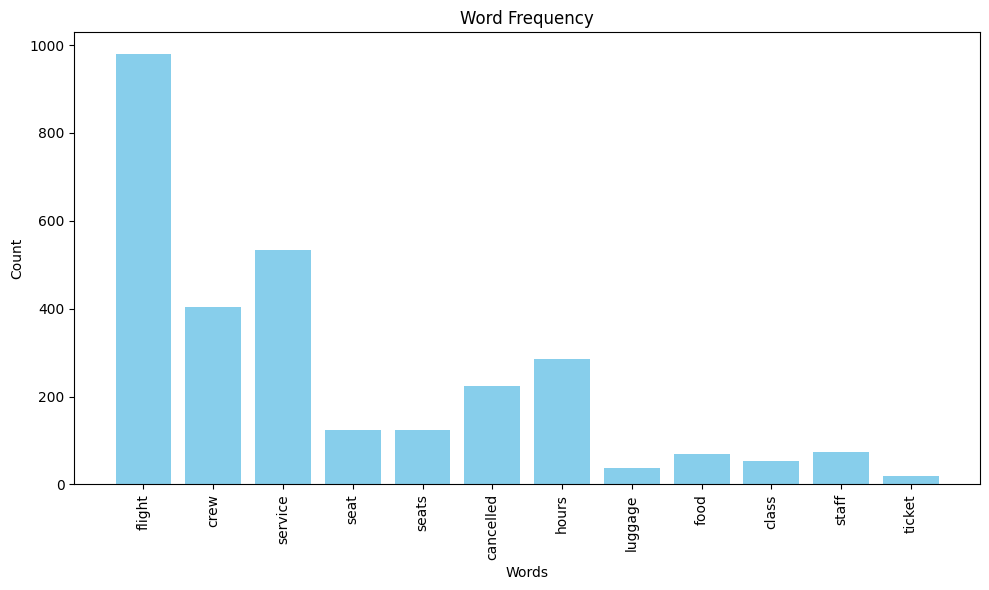

In [35]:
# Convert word_counts to a dictionary for easier plotting
word_counts_dict = dict(word_counts)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(word_counts_dict.keys(), word_counts_dict.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Among the topics reviewed, "flights" emerged as the most prevalent, followed by "service," while "tickets" received the least attention. 

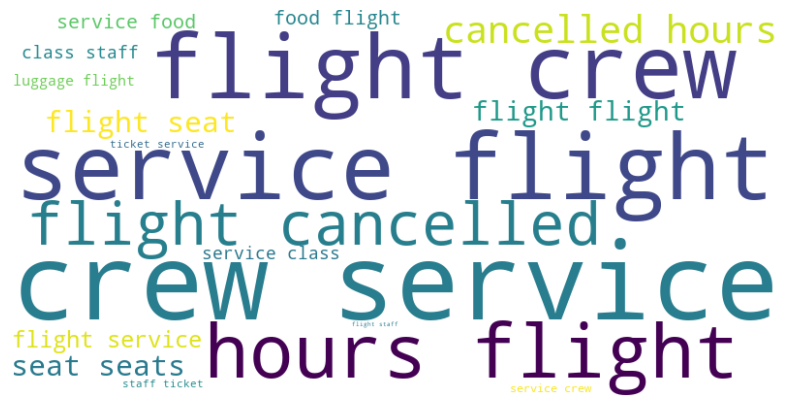

In [36]:
# Word cloud
all_words = ' '.join([word for sublist in data['topic_words'] for word in sublist])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

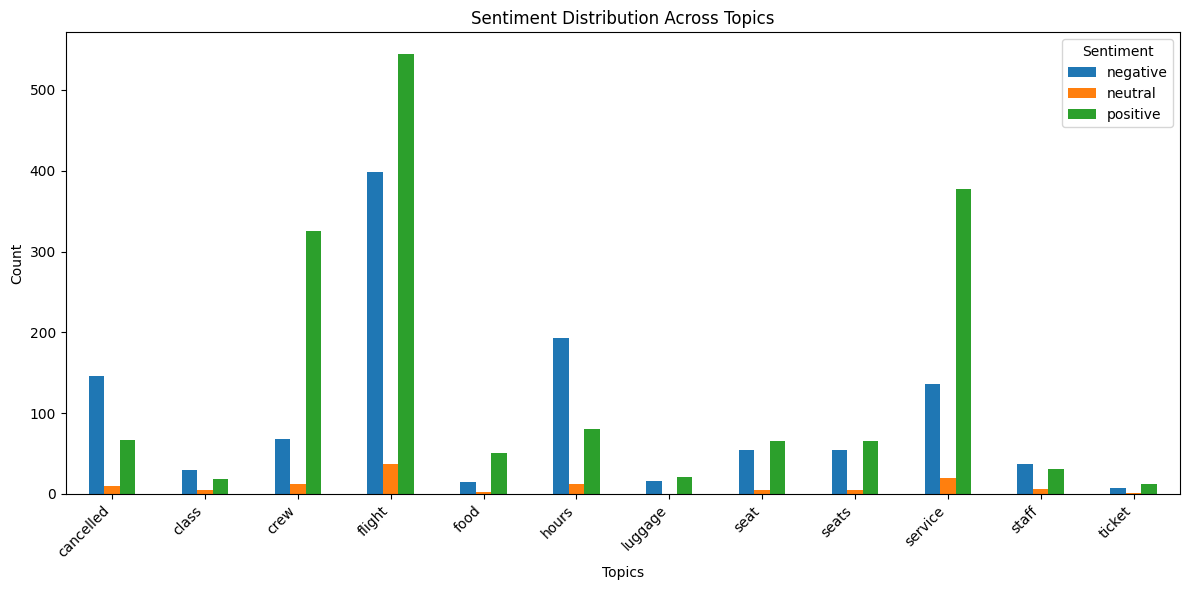

In [37]:
# Plotting
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', ax=plt.gca())
plt.xlabel('Topics')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Topics')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Analyzing Distribution over Topics ####

In [ ]:

# Filter rows containing the word 'cancelled' in the topic_words column
cancelled_rows = data[data['topic_words'].apply(lambda x: 'cancelled' in x)]

# Flatten the lists of words in the 'topic_words' column excluding 'cancelled'
other_topics_cancelled = [word for sublist in cancelled_rows['topic_words'] for word in sublist if word != 'cancelled']

# Count the occurrences of each topic for cancelled items
topic_counts_cancelled = Counter(other_topics_cancelled)

# Sort the topics by frequency for cancelled items
sorted_topics_cancelled = sorted(topic_counts_cancelled.items(), key=lambda x: x[1], reverse=True)

# Extract topic names and counts for cancelled items
topics_cancelled, counts_cancelled = zip(*sorted_topics_cancelled)

# Plotting for cancelled items
plt.figure(figsize=(10, 6))
plt.bar(topics_cancelled, counts_cancelled, color='purple')
plt.title('Distribution of Other Topics Mentioned with "cancelled"')
plt.xlabel('Other Topics')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cancellations and extended wait times, especially when it comes to things like flights and hours, as revealed by an analysis of refund frequencies across numerous topics.

In [ ]:
# Filter rows containing the word 'refund' in the topic_words column
refund_rows = data[data['tokanized_words'].apply(lambda x: 'refund' in x)]

# Flatten the lists of words in the 'topic_words' column excluding 'refund'
other_topics_refund = [word for sublist in refund_rows['topic_words'] for word in sublist if word != 'refund']

# Count the occurrences of each topic for refund items
topic_counts_refund = Counter(other_topics_refund)

# Sort the topics by frequency for refund items
sorted_topics_refund = sorted(topic_counts_refund.items(), key=lambda x: x[1], reverse=True)

# Extract topic names and counts for refund items if not empty
if sorted_topics_refund:
    topics_refund, counts_refund = zip(*sorted_topics_refund)
    
    # Plotting for refund items
    plt.figure(figsize=(10, 6))
    plt.bar(topics_refund, counts_refund, color='purple')
    plt.title('Distribution of "refund" over Topics')
    plt.xlabel('Other Topics')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No other topics found with 'refund'.")

Examining the frequency of refunds across disciplines offers valuable insight about customer experience problem areas. Flights appear as the most frequency refunded topic, followed by luggage, service, tickets, seats, staff and crew, indicating potential pain points to manage but applying frequency of funding of "hours" and "cancellation" were noted, though not enough to inform further investigation.

## Conclusion ##

Based on the sentiment analysis of reviews for British Airways, it is clear that most customers have favorable opinions of the airline's offerings. A majority of positive emotion indicates general satisfaction with British Airways' activities in a number of different areas. However, the negative opinion highlights areas that require addressing, specifically flight delays, cancellations, and service-related issues. Acknowledging these observations, British Airways is prepared to boost positive experiences, address issues, and continuously improve their offerings in order to increase customer satisfaction and loyalty. British Airways can firmly establish itself as a top airline by adopting a proactive strategy guided by these results, consistently surpassing consumer expectations, and building long-lasting connections with its customers.